In [16]:
!pip install tensorflow==1.14.0
import numpy as np
import tensorflow.compat.v1 as tf
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

     |████████████████████████████████| 105.8MB 253kB/s eta 0:00:011    |████▌                           | 14.8MB 7.7MB/s eta 0:00:12     |████████████████████████████▏   | 93.2MB 10.7MB/s eta 0:00:02
     |████████████████████████████████| 3.2MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 491kB 9.7MB/s eta 0:00:01
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [59]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newwire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [60]:
def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [61]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [92]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [95]:
from keras.callbacks import LambdaCallback

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[1].get_weights()))

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[print_weights]
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
[array([[ 0.11629804,  0.05642284, -0.09609852, ..., -0.03283951,
        -0.10974018, -0.11256547],
       [-0.13509531,  0.01102397,  0.04182506, ..., -0.14871389,
        -0.08305904,  0.20448367],
       [ 0.22555992,  0.22091825,  0.07926185, ..., -0.00277177,
         0.03785228, -0.09488115],
       ...,
       [-0.25920665,  0.11459961,  0.01130073, ..., -0.21108261,
         0.12518151, -0.05486997],
       [-0.16442603, -0.06685828, -0.10677282, ...,  0.06739863,
        -0.13797739,  0.06596782],
       [ 0.06181822,  0.0596494 , -0.04671204, ..., -0.16370887,
        -0.16072226, -0.25816002]], dtype=float32), array([ 0.03510753,  0.01704418,  0.03817895, -0.01639317,  0.03633928,
        0.06796131,  0.05942997,  0.03605675,  0.0628155 , -0.01743879,
        0.05279661,  0.04792665, -0.00374508,  0.03566058,  0.04070074,
        0.00822031,  0.02091015,  0.05417032,  0.06424399, -0.01935773,
        0.06708948,  0.

AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

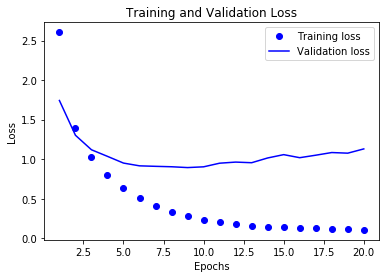

In [65]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

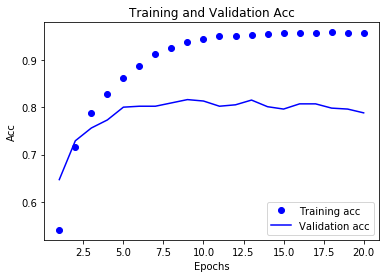

In [66]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [76]:
print(model.layers[2].get_weights())

[array([[-0.02445495,  0.24452807, -0.31988984, ..., -0.3037893 ,
         0.22652407, -0.17058568],
       [-0.3502013 ,  0.11442807, -0.3397906 , ..., -0.28989667,
        -0.31778705,  0.23255377],
       [-0.26939863,  0.05199578, -0.34458724, ..., -0.05801027,
        -0.2574648 , -0.42125314],
       ...,
       [-0.07793403, -0.17763871, -0.22539903, ...,  0.18379721,
        -0.19661991,  0.06711462],
       [-0.3230944 , -0.24629492,  0.07992607, ...,  0.26126063,
         0.2574086 , -0.16317926],
       [-0.10621179, -0.27528647, -0.31930265, ...,  0.17109802,
         0.00874678,  0.04840181]], dtype=float32), array([-0.06719954, -0.03681634, -0.03002389,  0.01145748,  0.03191552,
       -0.05276923, -0.0128688 ,  0.03342386, -0.01050218, -0.00159017,
       -0.00814208, -0.05332091, -0.05338078,  0.01820663,  0.01209927,
       -0.00206129,  0.01513575, -0.00950472,  0.03681939, -0.03635804,
       -0.03689119, -0.04474489, -0.0296401 , -0.08198398,  0.00063175,
       -0.